In [40]:
import pandas as pd
import numpy as np

df = pd.read_excel("/home/ubuntu/Desktop/TCOB21/DSBDAL/Student_Data1.xlsx")
df

,math score,reading score,writing score,placement score,club join date,placement offer count
0,69,81,63,91,2019,3
1,64,78,74,75,2020,2
2,79,82,61,82,2020,2
3,63,84,71,86,2020,3
4,60,93,69,84,2018,2
5,70,81,67,77,2019,2
6,65,86,65,78,2020,2
7,80,78,70,87,2021,3
8,55,80,88,86,2018,3
9,62,81,62,82,2020,2


<AxesSubplot:>

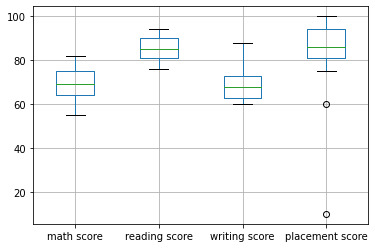

In [41]:
col = ['math score', 'reading score' , 'writing score','placement score']
df.boxplot(col)

In [42]:
print(np.where(df['math score']>90))
print(np.where(df['reading score']<25))
print(np.where(df['writing score']<30))

(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)


In [43]:
m = df['placement score'].median()
m

86.0

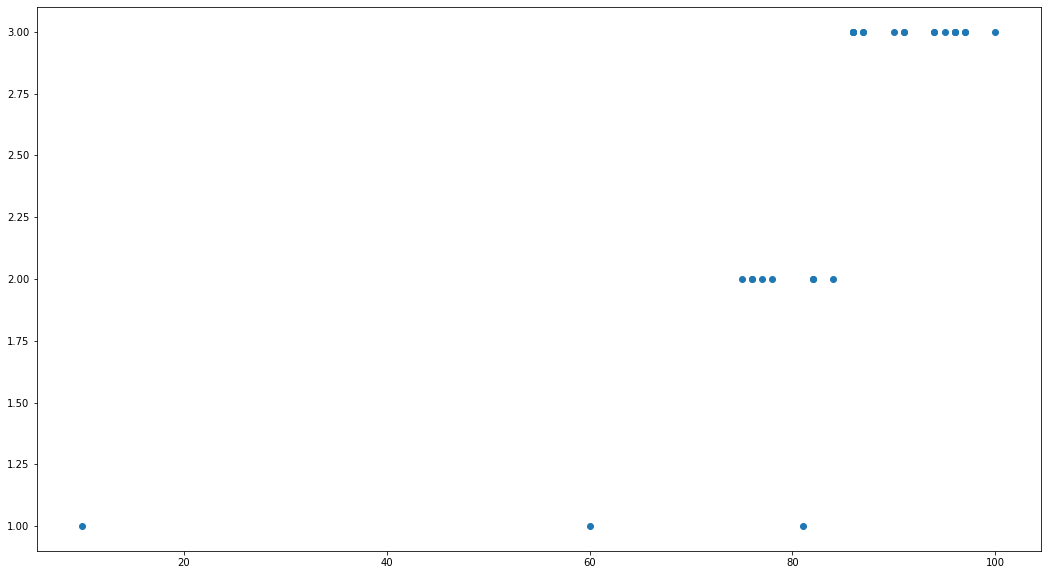

In [44]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df['placement score'], df['placement offer count'])
plt.show()

In [45]:
print(np.where((df['placement score']<50)&(df['placement offer count']>1)))
print(np.where((df['placement score']>85)&(df['placement offer count']<3)))

(array([], dtype=int64),)
(array([], dtype=int64),)


In [46]:
from scipy import stats
z = np.abs(stats.zscore(df['math score']))
print(z)

0     0.089370
1     0.809294
2     1.350479
3     0.953279
4     1.385234
5     0.054615
6     0.665309
7     1.494464
8     2.105158
9     1.097264
10    1.241249
11    0.774539
12    0.089370
13    1.097264
14    0.233355
15    0.918524
16    1.062509
17    1.206494
18    0.521325
19    0.774539
20    0.089370
21    0.486570
22    1.385234
23    1.782434
24    0.665309
25    0.630554
26    0.774539
27    0.198600
28    0.918524
Name: math score, dtype: float64


In [47]:
sorted_rscore= sorted(df['placement score']) 
sorted_rscore
q1 = np.percentile(sorted_rscore, 25)
q3 = np.percentile(sorted_rscore, 75) 
print(q1,q3)

IQR = q3-q1
lwr_bound = q1-(1.5*IQR) 
upr_bound = q3+(1.5*IQR) 
print(lwr_bound, upr_bound)

r_outliers = [] 
for i in sorted_rscore: 
    if (i<lwr_bound or i>upr_bound): 
        r_outliers.append(i) 
print(r_outliers)


81.0 94.0
61.5 113.5
[10, 60]


In [49]:
#Handling Outliers
#Trimming
new_df=df 
sample_outliers=[15,22]
for i in sample_outliers: 
    new_df.drop(i,inplace=True) 
new_df

,math score,reading score,writing score,placement score,club join date,placement offer count
0,69,81,63,91,2019,3
1,64,78,74,75,2020,2
2,79,82,61,82,2020,2
3,63,84,71,86,2020,3
4,60,93,69,84,2018,2
5,70,81,67,77,2019,2
6,65,86,65,78,2020,2
7,80,78,70,87,2021,3
8,55,80,88,86,2018,3
9,62,81,62,82,2020,2


In [52]:
#Quantile based flooring and capping
df = pd.read_excel("/home/ubuntu/Desktop/TCOB42/DSBDAL/Student_Data1.xlsx")
df_stud=df 

ninetieth_percentile = np.percentile(df_stud['math score'], 90) 
b = np.where(df_stud['math score']>ninetieth_percentile, ninetieth_percentile, df_stud['math score']) 

print("New array:",b) 

df_stud.insert(1,"m score",b,True) 
df_stud

New array: [69.  64.  78.2 63.  60.  70.  65.  78.2 55.  62.  61.  75.  69.  62.
 68.  76.  77.  78.  66.  75.  69.  73.  60.  78.2 65.  74.  75.  71.
 76. ]


,math score,m score,reading score,writing score,placement score,club join date,placement offer count
0,69,69.0,81,63,91,2019,3
1,64,64.0,78,74,75,2020,2
2,79,78.2,82,61,82,2020,2
3,63,63.0,84,71,86,2020,3
4,60,60.0,93,69,84,2018,2
5,70,70.0,81,67,77,2019,2
6,65,65.0,86,65,78,2020,2
7,80,78.2,78,70,87,2021,3
8,55,55.0,80,88,86,2018,3
9,62,62.0,81,62,82,2020,2
